# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- **Use Pandas to load, inspect, and clean the dataset appropriately.**
- **Transform relevant columns to create measures that address the problem at hand.**
- conduct EDA: visualization and statistical measures to systematically understand the structure of the data
- recommend a set of airplanes and makes conforming to the client's request and identify at least *two* factors contributing to airplane safety. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.

### Make relevant library imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Inspection

### Load in data from the relevant directory and inspect the dataframe.
- inspect NaNs, datatypes, and summary statistics

In [22]:
aviation_data = pd.read_csv("AviationData.csv", encoding="cp1252", low_memory=False)
aviation_data.head()
aviation_data.info()
aviation_data.head()
aviation_data.describe()
aviation_data.describe(include="number")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Cleaning

### Filtering aircrafts and events

We want to filter the dataset to include aircraft that the client is interested in an analysis of:
- inspect relevant columns
- figure out any reasonable imputations
- filter the dataset

In [23]:
aviation_data.info()
aviation_data[[
    "Event.Date",          
    "Make",
    "Model",
    "Aircraft.damage",      
    "Injury.Severity",     
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries",
    "Total.Uninjured",
    "Number.of.Engines",
    "Engine.Type",
    "Aircraft.Category",
    "Purpose.of.flight",
    "Broad.phase.of.flight",
]].head(10)

aviation_data['Event.Date']=pd.to_datetime(aviation_data['Event.Date'])
aviation_data.info()
mask_1983=aviation_data["Event.Date"].dt.year>=1983 #create a filter for relevant years
aviation_data_1983=aviation_data[mask_1983].copy() #create a copy of that filter so it is its own dataframe
#assume null figures in injury columns mean that there were 0 injuries and impute 0 into the null values
aviation_data_1983[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']]=aviation_data_1983[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].fillna(0)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [24]:
aviation_data_1983.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85289 entries, 3600 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                85289 non-null  object        
 1   Investigation.Type      85289 non-null  object        
 2   Accident.Number         85289 non-null  object        
 3   Event.Date              85289 non-null  datetime64[ns]
 4   Location                85237 non-null  object        
 5   Country                 85073 non-null  object        
 6   Latitude                34379 non-null  object        
 7   Longitude               34370 non-null  object        
 8   Airport.Code            48435 non-null  object        
 9   Airport.Name            50514 non-null  object        
 10  Injury.Severity         84289 non-null  object        
 11  Aircraft.damage         82151 non-null  object        
 12  Aircraft.Category       28723 non-null  object  

### Cleaning and constructing Key Measurables

Injuries and robustness to destruction are a key interest point for the client. Clean and impute relevant columns and then create derived fields that best quantifies what the client wishes to track. **Use commenting or markdown to explain any cleaning assumptions as well as any derived columns you create.**

**Construct metric for fatal/serious injuries**

*Hint:* Estimate the total number of passengers on each flight. The likelihood of serious / fatal injury can be estimated as a fraction from this.

In [25]:
#total occupants can be estimated by the sum of all injured plus uninjured passengers
aviation_data_1983["Total.Occupants"] = (aviation_data_1983["Total.Fatal.Injuries"]+ aviation_data_1983["Total.Serious.Injuries"]+ aviation_data_1983["Total.Minor.Injuries"]+ aviation_data_1983["Total.Uninjured"])
#then take the sum of the serious and fatal inuries and divide them by the total occupancy 
aviation_data_1983["SumFatalSerious.Injuries"] = (aviation_data_1983["Total.Fatal.Injuries"]+ aviation_data_1983["Total.Serious.Injuries"])
#we also need to handle cases with division by 0 by replacing 0 in total occupancy with NaN
aviation_data_1983["FatalSeriousInjury.Rate"]=(aviation_data_1983["SumFatalSerious.Injuries"]/aviation_data_1983['Total.Occupants'].replace(0,np.nan))

In [26]:
aviation_data_1983['Aircraft.damage'].head(50)

3600            NaN
3601    Substantial
3602    Substantial
3603    Substantial
3604    Substantial
3605    Substantial
3606            NaN
3607      Destroyed
3608      Destroyed
3609      Destroyed
3610    Substantial
3611    Substantial
3612    Substantial
3613    Substantial
3614    Substantial
3615    Substantial
3616    Substantial
3617    Substantial
3618      Destroyed
3619      Destroyed
3620      Destroyed
3621    Substantial
3622    Substantial
3623    Substantial
3624    Substantial
3625      Destroyed
3626    Substantial
3627      Destroyed
3628      Destroyed
3629      Destroyed
3630      Destroyed
3631      Destroyed
3632      Destroyed
3633      Destroyed
3634    Substantial
3635    Substantial
3636      Destroyed
3637      Destroyed
3638      Destroyed
3639      Destroyed
3640    Substantial
3641    Substantial
3642    Substantial
3643    Substantial
3644    Substantial
3645            NaN
3646      Destroyed
3647    Substantial
3648    Substantial
3649    Substantial


**Aircraft.Damage**
- identify and execute any cleaning tasks
- construct a derived column tracking whether an aircraft was destroyed or not.

In [27]:
#get rid of any whitespace 
aviation_data_1983["Aircraft.damage"] = (aviation_data_1983["Aircraft.damage"].str.strip().str.upper())

#drop rows with null values for damage as we dont have the needed information and no safe assumptions can be made. 

aviation_damage_clean_1983 = aviation_data_1983.dropna(subset=["Aircraft.damage"]).copy()

#create a new column with True / false represented as 0/1  for whether the plane was destroyed 

aviation_damage_clean_1983['Aircraft.Destroyed'] = (aviation_damage_clean_1983['Aircraft.damage']=="DESTROYED").astype(int)



### Investigate the *Make* column
- Identify cleaning tasks here
- List cleaning tasks clearly in markdown
- Execute the cleaning tasks
- For your analysis, keep Makes with a reasonable number (you can put the threshold at 50 though lower could work as well)

In [28]:

aviation_damage_clean_1983['Make'].info()
#we will drop rows with no make
#we will strip whitespace 
#we will keep info about makes that appear a minimum of 50 times (have data on 50 or more accidents)

aviation_damage_clean_1983=aviation_damage_clean_1983.dropna(subset=['Make']).copy()

aviation_damage_clean_1983['Make']=(aviation_damage_clean_1983['Make'].str.strip().str.lower())

#to keep makes with only 50+ occurences we need to get a list of makes with their counts: 
make_counts=aviation_damage_clean_1983['Make'].value_counts()

#get makes from make_counts with 50 +

needed_makes= make_counts[make_counts>49].index

#use this list of makes to filter the dataset 

aviation_needed_makes=aviation_damage_clean_1983[aviation_damage_clean_1983['Make'].isin(needed_makes)].copy()


<class 'pandas.core.series.Series'>
Index: 82151 entries, 3601 to 88886
Series name: Make
Non-Null Count  Dtype 
--------------  ----- 
82112 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


### Inspect Model column
- Get rid of any NaNs.
- Inspect the column and counts for each model/make. Are model labels unique to each make?
- If not, create a derived column that is a unique identifier for a given plane type.

<class 'pandas.core.series.Series'>
Index: 68457 entries, 3601 to 88886
Series name: Model
Non-Null Count  Dtype 
--------------  ----- 
68438 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB


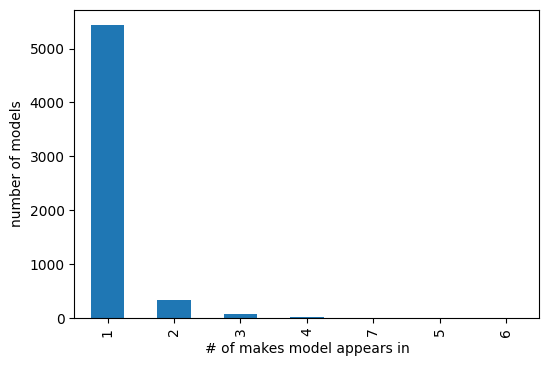

In [29]:
aviation_needed_makes['Model'].info()
#get rid of NaN
aviation_needed_makes=aviation_needed_makes.dropna(subset=['Model']).copy()
#top models:
aviation_needed_makes["Model"].value_counts().head(20)

#to check if a model can appear in more that one make we will create a bar chart that plots the number of makes a model appears in against the number of models

model_make_counts = aviation_needed_makes.groupby("Model")["Make"].nunique()

model_make_counts.value_counts().plot(kind='bar',figsize=(6,4),xlabel='# of makes model appears in',ylabel='number of models')
plt.show()





In [30]:
#We can see with the chart above that while most models belong to only one make, some models appear in 2, 3 and 4 makes. Therefor we need to proceed with creating a derived column that is a unique identifier fora plane type. 
aviation_needed_makes['MakeModel']=(aviation_needed_makes['Make'].astype(str)+" "+aviation_needed_makes['Model'].astype(str))

### Cleaning other columns
- there are other columns containing data that might be related to the outcome of an accident. We list a few here:
- Engine.Type
- Weather.Condition
- Number.of.Engines
- Purpose.of.flight
- Broad.phase.of.flight

Inspect and identify potential cleaning tasks in each of the above columns. Execute those cleaning tasks. 

**Note**: You do not necessarily need to impute or drop NaNs here.

In [31]:
aviation_needed_makes['Engine.Type'].head()
aviation_needed_makes['Engine.Type']=aviation_needed_makes['Engine.Type'].str.strip().str.lower()



In [32]:
aviation_needed_makes['Weather.Condition'].head()
aviation_needed_makes['Weather.Condition']=aviation_needed_makes['Weather.Condition'].str.strip().str.lower()

aviation_needed_makes["Weather.Condition"] = (aviation_needed_makes["Weather.Condition"].fillna("unknown"))


In [33]:
aviation_needed_makes["Number.of.Engines"] = (aviation_needed_makes["Number.of.Engines"].astype("Int64"))

In [34]:
aviation_needed_makes['Purpose.of.flight']=aviation_needed_makes['Purpose.of.flight'].str.strip().str.lower().fillna('unknown')

In [35]:
aviation_needed_makes['Broad.phase.of.flight']=aviation_needed_makes['Broad.phase.of.flight'].str.strip().str.lower().fillna('unknown')

### Column Removal
- inspect the dataframe and drop any columns that have too many NaNs

In [36]:
#get the percent of values in each column that are NaN: 
percent_of_null_values= aviation_needed_makes.isna().mean().sort_values(ascending=False)
percent_of_null_values.head(10)



Schedule             0.864666
Air.carrier          0.825346
FAR.Description      0.701599
Aircraft.Category    0.699012
Longitude            0.627648
Latitude             0.627561
Airport.Code         0.427511
Airport.Name         0.400508
Publication.Date     0.172273
Engine.Type          0.066498
dtype: float64

In [37]:
#get rid of columns that have NaN greater than 50 % 
unneeded_columns= percent_of_null_values[percent_of_null_values>=.5].index

aviation_needed_makes=aviation_needed_makes.drop(columns=unneeded_columns)

### Save DataFrame to csv
- its generally useful to save data to file/server after its in a sufficiently cleaned or intermediate state
- the data can then be loaded directly in another notebook for further analysis
- this helps keep your notebooks and workflow readable, clean and modularized

In [38]:
aviation_needed_makes.to_csv('cleaned_aviation_data.csv',index=False)